In [1]:
import numpy as np
import pandas as pd

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

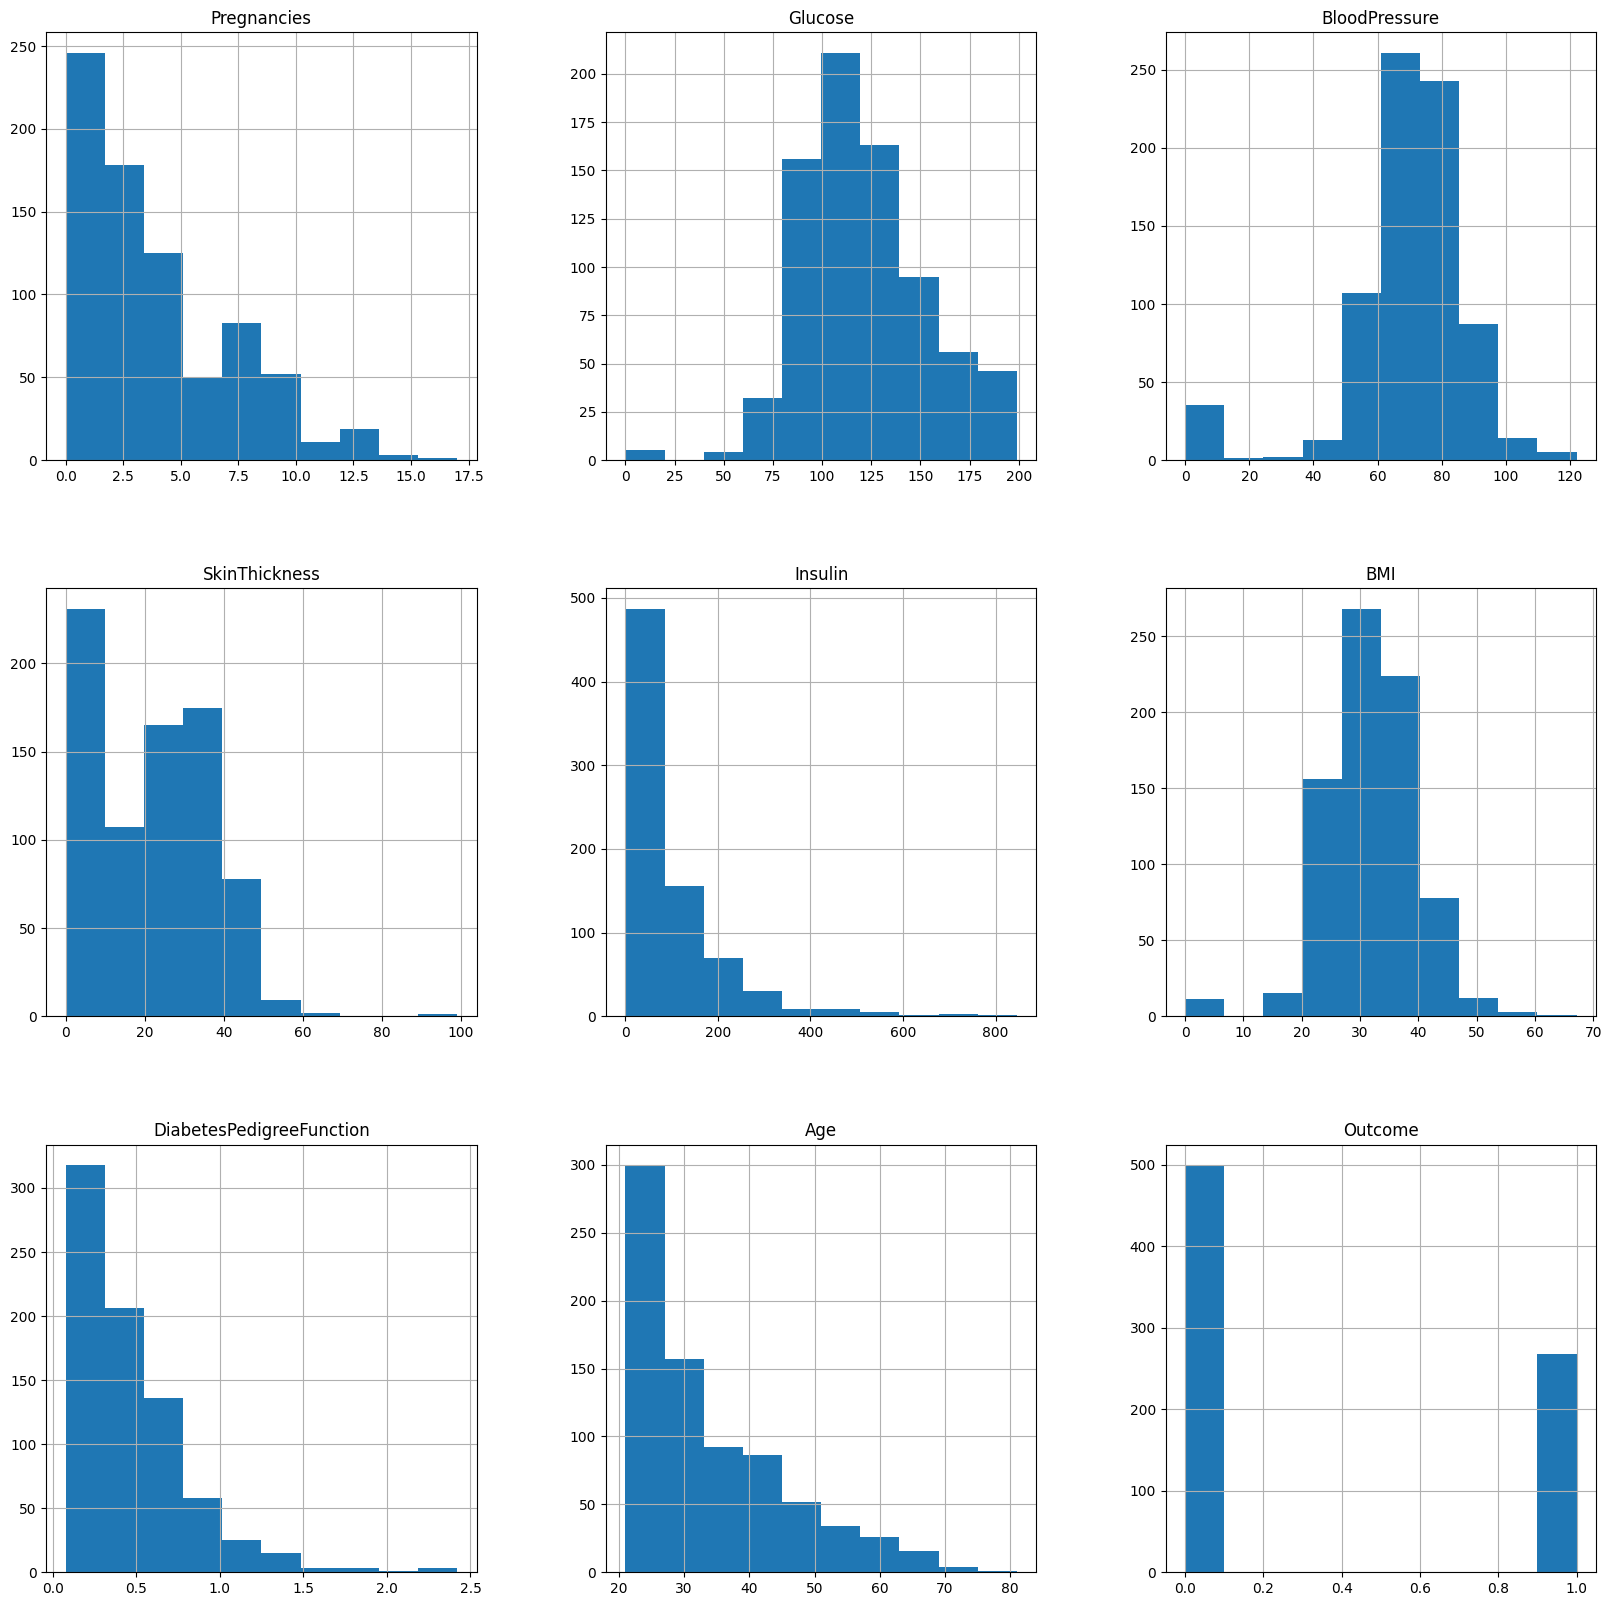

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.hist(figsize=(20, 20))

# Fill NaN values

Substitute 0 with NaN values in all columns except `Pregnencies` and `Outcome`

In [3]:
# column names to substitute 0 values
columns = list(df.columns)[1:-1]

# substitute 0 with NaN
df_copy = df.copy(deep=True)
df_copy[columns] = df_copy[columns].replace(0, np.NaN)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
drop_labels = ['DiabetesPedigreeFunction', 'SkinThickness', 'BloodPressure', 'Pregnancies']
df_final = df_copy.drop(labels=drop_labels, axis=1)
df_final.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,NaN,33.6,50,1
1,85.0,NaN,26.6,31,0
2,183.0,NaN,23.3,32,1
3,89.0,94.0,28.1,21,0
4,137.0,168.0,43.1,33,1


In [5]:
df_final.tail()

,Glucose,Insulin,BMI,Age,Outcome
763,101.0,180.0,32.9,63,0
764,122.0,NaN,36.8,27,0
765,121.0,112.0,26.2,30,0
766,126.0,NaN,30.1,47,1
767,93.0,NaN,30.4,23,0


# Impute missing data

Glucose Insulin BMI

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values = np.nan, n_neighbors=3, weights = 'uniform')
fit_array = imputer.fit_transform(df_final)
fit_array

array([[148.        , 176.        ,  33.6       ,  50.        ,
          1.        ],
       [ 85.        ,  47.66666667,  26.6       ,  31.        ,
          0.        ],
       [183.        , 195.        ,  23.3       ,  32.        ,
          1.        ],
       ...,
       [121.        , 112.        ,  26.2       ,  30.        ,
          0.        ],
       [126.        , 279.        ,  30.1       ,  47.        ,
          1.        ],
       [ 93.        ,  74.        ,  30.4       ,  23.        ,
          0.        ]])

In [7]:
df_new = pd.DataFrame(fit_array, columns=list(df_final.columns))
df_new.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,176.000000,33.6,50.0,1.0
1,85.0,47.666667,26.6,31.0,0.0
2,183.0,195.000000,23.3,32.0,1.0
3,89.0,94.000000,28.1,21.0,0.0
4,137.0,168.000000,43.1,33.0,1.0


In [8]:
df_new.tail()

,Glucose,Insulin,BMI,Age,Outcome
763,101.0,180.0,32.9,63.0,0.0
764,122.0,144.0,36.8,27.0,0.0
765,121.0,112.0,26.2,30.0,0.0
766,126.0,279.0,30.1,47.0,1.0
767,93.0,74.0,30.4,23.0,0.0


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

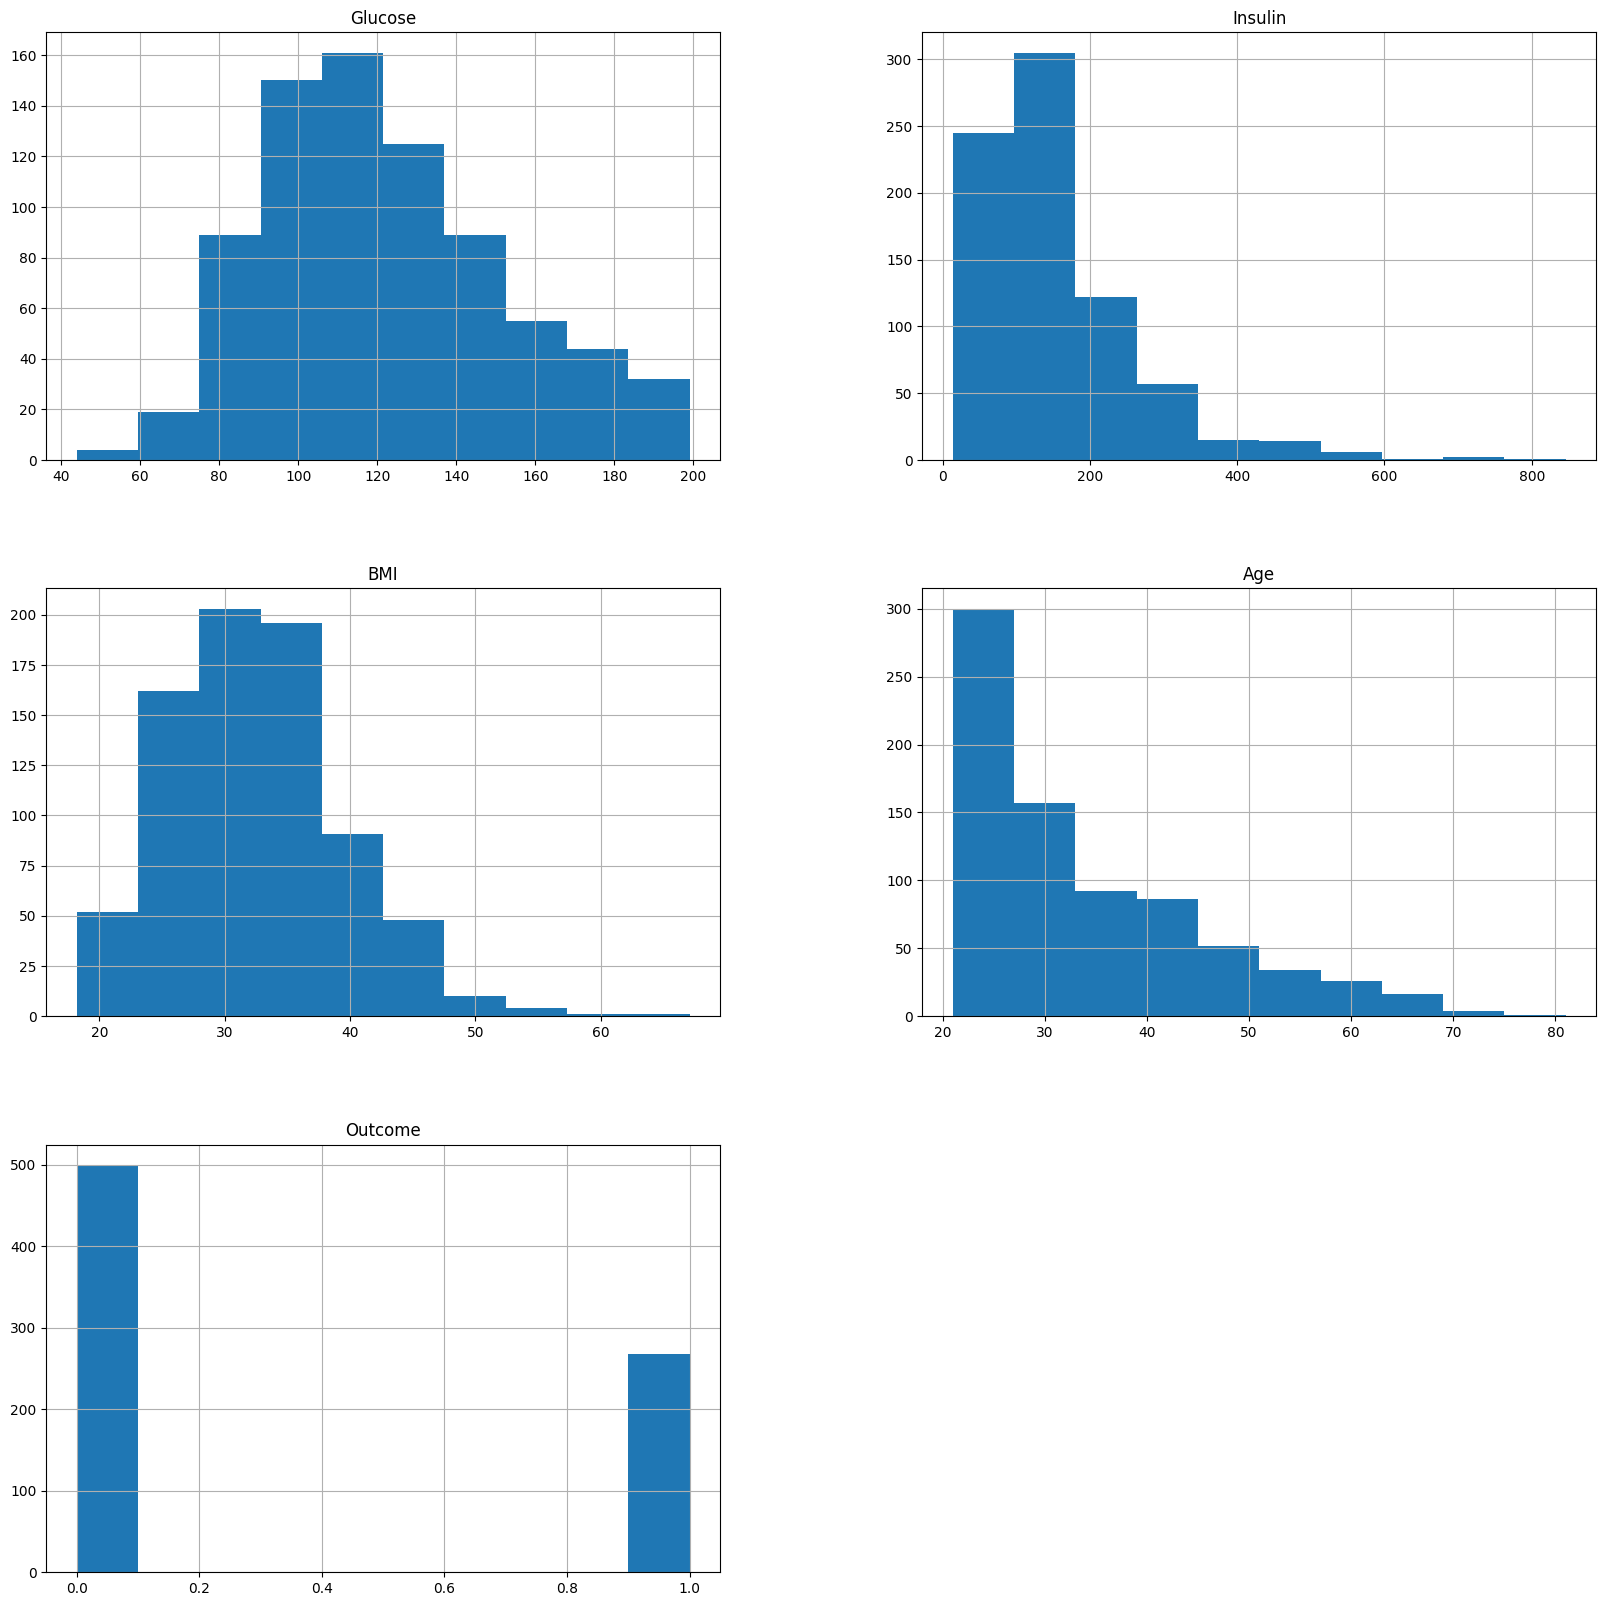

In [9]:
df_new.hist(figsize=(20, 20))

In [10]:
df_new.to_csv('final_data.csv', index=False)

# ModelPrep

In [11]:
!pip install imblearn

In [12]:
import pandas as pd
import seaborn as sns

from collections import Counter

from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [13]:
df = pd.read_csv('../data/final_data.csv', index_col=[0])
df.head()

,Insulin,BMI,Age,Outcome
Glucose,,,,
148.0,176.000000,33.6,50.0,1.0
85.0,47.666667,26.6,31.0,0.0
183.0,195.000000,23.3,32.0,1.0
89.0,94.000000,28.1,21.0,0.0
137.0,168.000000,43.1,33.0,1.0


<Axes: xlabel='Outcome', ylabel='count'>

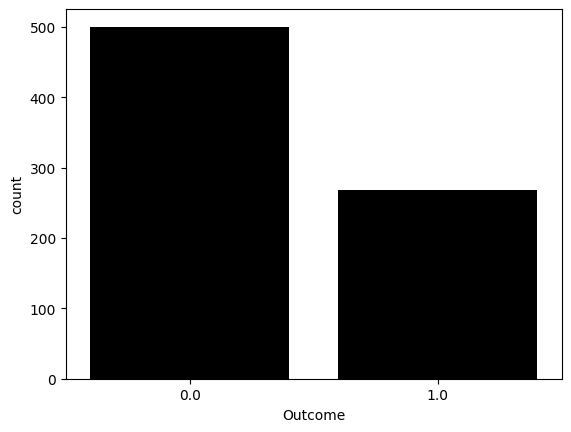

In [14]:
# check for imbalancing
sns.countplot(x='Outcome', data=df, color='Black', stat='count')

# Handling imbalancing

* Oversampling minority class

In [15]:
# split dataset
x = df.drop(["Outcome"],axis = 1)
x.head()

,Insulin,BMI,Age
Glucose,,,
148.0,176.000000,33.6,50.0
85.0,47.666667,26.6,31.0
183.0,195.000000,23.3,32.0
89.0,94.000000,28.1,21.0
137.0,168.000000,43.1,33.0


In [16]:
y = df.Outcome
y

Glucose
148.0    1.0
85.0     0.0
183.0    1.0
89.0     0.0
137.0    1.0
        ... 
101.0    0.0
122.0    0.0
121.0    0.0
126.0    1.0
93.0     0.0
Name: Outcome, Length: 768, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=300)

In [18]:
print("Before oversampling: ", Counter(y_train))
smotm = SMOTETomek(random_state=139)
X_train_smotm, y_train_smotm = smotm.fit_resample(X_train, y_train)
print("After oversampling: ", Counter(y_train_smotm))

Before oversampling:  Counter({0.0: 399, 1.0: 215})
After oversampling:  Counter({0.0: 362, 1.0: 362})


In [19]:
X_test

,Insulin,BMI,Age
Glucose,,,
129.0,118.333333,39.900000,44.0
100.0,184.000000,36.600000,46.0
189.0,249.000000,28.500000,37.0
119.0,220.000000,45.600000,29.0
121.0,327.333333,26.500000,62.0
...,...,...,...
147.0,145.666667,29.500000,50.0
114.0,110.000000,23.800000,31.0
74.0,34.666667,28.166667,22.0


In [20]:
y_test

Glucose
129.0    1.0
100.0    1.0
189.0    0.0
119.0    1.0
121.0    0.0
        ... 
147.0    1.0
114.0    0.0
74.0     0.0
115.0    0.0
129.0    1.0
Name: Outcome, Length: 154, dtype: float64

# Making Classifiers

In [21]:
# random forest
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy')
rfc.fit(X_train_smotm, y_train_smotm)
predictions = rfc.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7467532467532467
Classification report
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.80       101
         1.0       0.61      0.74      0.67        53

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [22]:
# xgboost
xgb_model = XGBClassifier(gamma=5, objective="binary:logistic", reg_alpha=0.85)
xgb_model.fit(X_train_smotm, y_train_smotm)
predictions = xgb_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7662337662337663
Classification report
               precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       101
         1.0       0.63      0.77      0.69        53

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154



In [23]:
# svm
svc_model = SVC(kernel='poly', gamma='scale')
svc_model.fit(X_train_smotm, y_train_smotm)
predictions = svc_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7402597402597403
Classification report
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       101
         1.0       0.64      0.57      0.60        53

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.74       154



In [24]:
# naive baise
nb_model = GaussianNB()
nb_model.fit(X_train_smotm, y_train_smotm)
predictions = nb_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7077922077922078
Classification report
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       101
         1.0       0.57      0.62      0.59        53

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.71      0.71       154



In [25]:
# logistic regression
lr = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear')
lr.fit(X_train_smotm, y_train_smotm)
predictions = lr.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7272727272727273
Classification report
               precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       101
         1.0       0.58      0.74      0.65        53

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154

